In [1]:
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle

from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
import time


print("Tensorflow version " + tf.__version__)
tf.set_random_seed(0)

Tensorflow version 1.13.0-rc1


Pour installer ce paquet avec conda run:
conda install -c anaconda xlrd 

In [5]:
Taille_Sample = 40
# Load training and eval data
data = np.loadtxt("chev1_patte_avant_ext.txt")
print ("Data_Cheval.shape", data.shape)
print(data)
#Pas_Gauche = data[:,:-2]
#Pas_Droite = data[:,-2:-1]
#Diff_Gauche_Droite = data[:,-1:]
#print(Pas_Gauche)
#print(Pas_Droite)
#print(Diff_Gauche_Droite)
print(Diff_Gauche_Droite)
data_reshape = data.reshape(int(data.shape[0]/40),40,3, 1)


Data_Cheval.shape (107440, 3)
[[-38.239998    -0.8299999  -11.729284  ]
 [-38.239998    -0.8299999  -13.574999  ]
 [ 13.650001    -0.24000072 -13.432856  ]
 ...
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]
[[-11.729284]
 [-13.574999]
 [-13.432856]
 ...
 [  0.      ]
 [  0.      ]
 [  0.      ]]


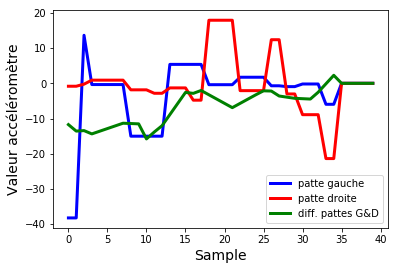

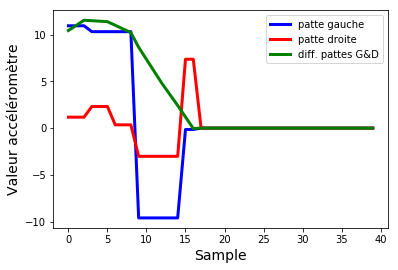

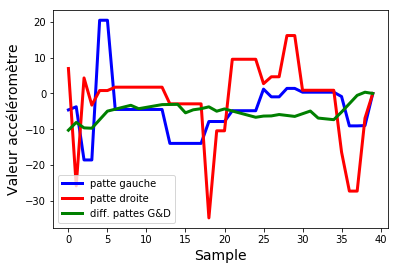

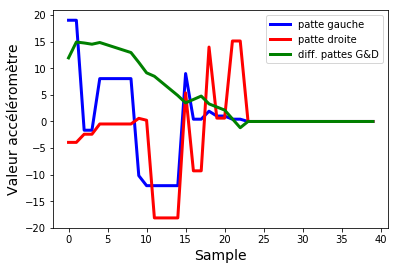

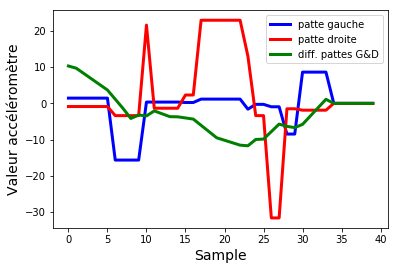

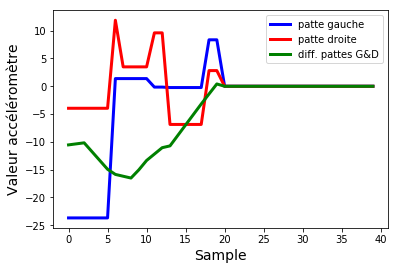

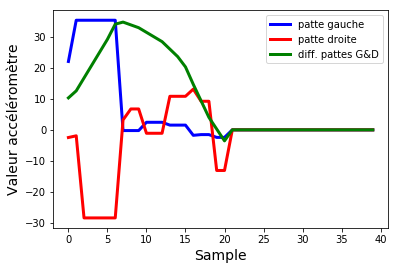

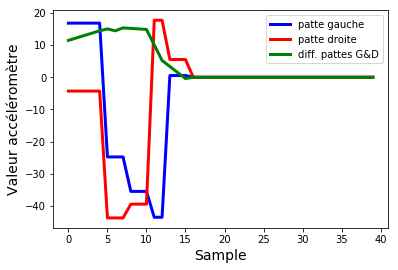

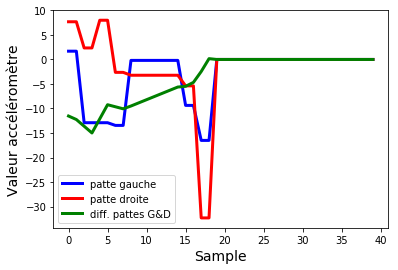

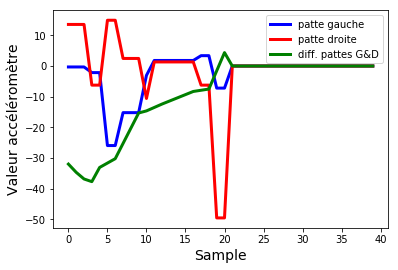

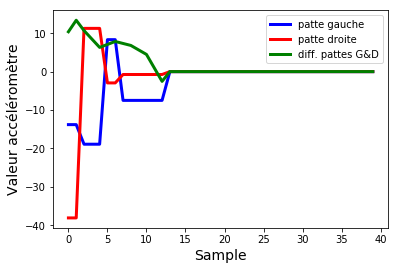

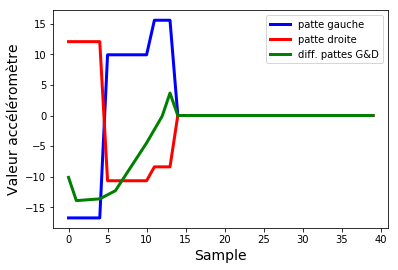

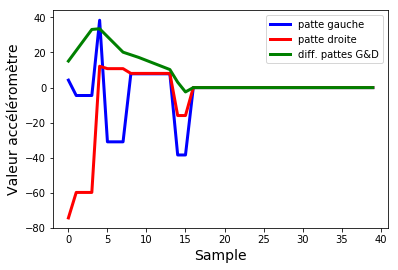

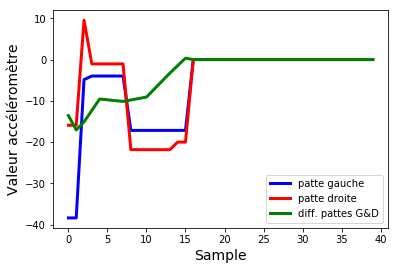

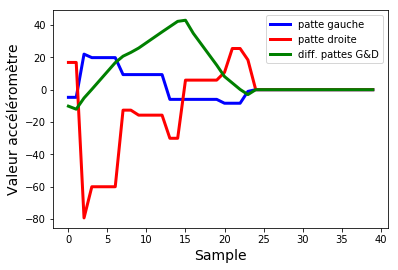

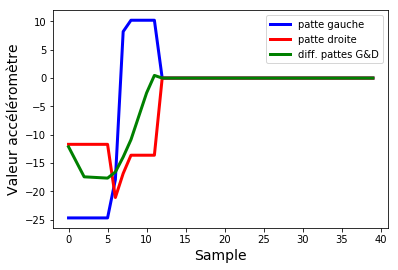

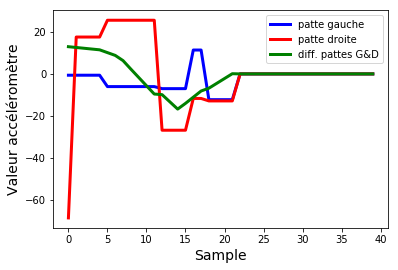

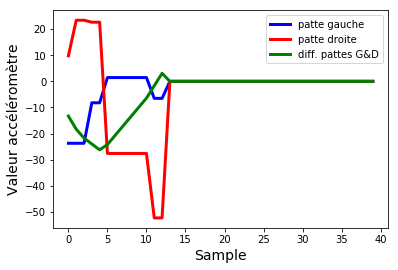

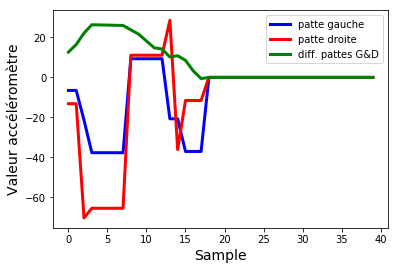

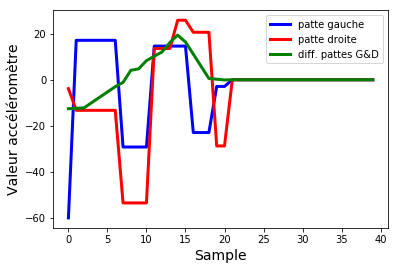

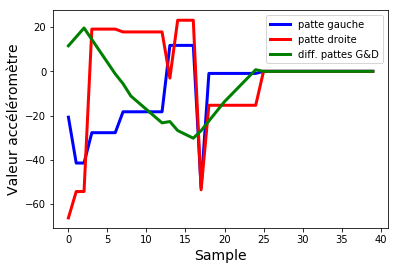

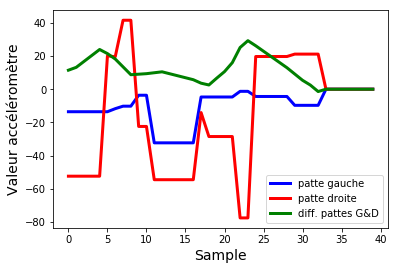

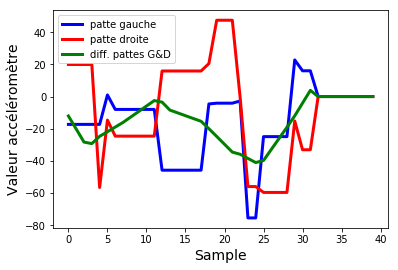

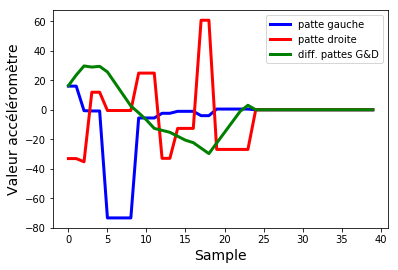

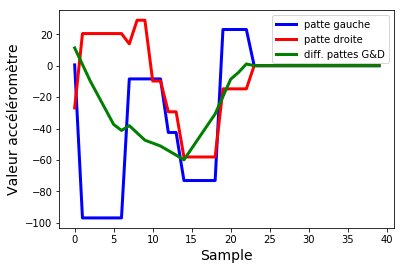

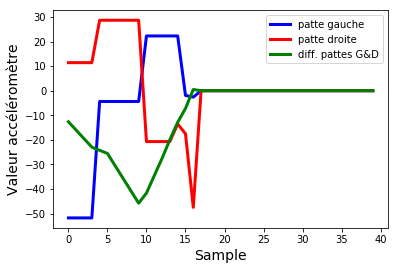

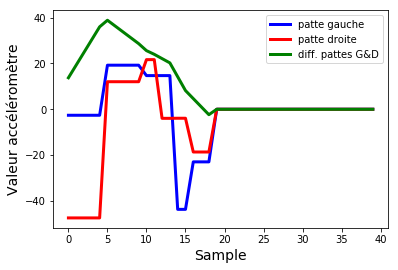

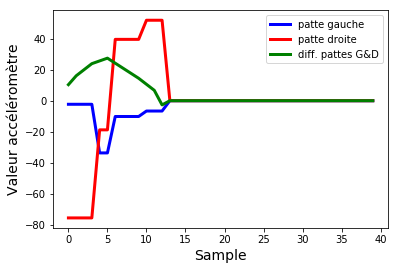

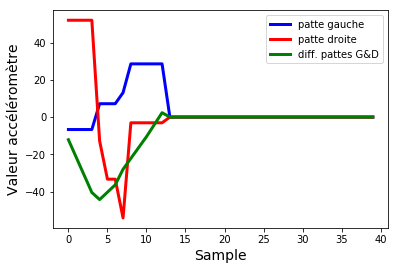

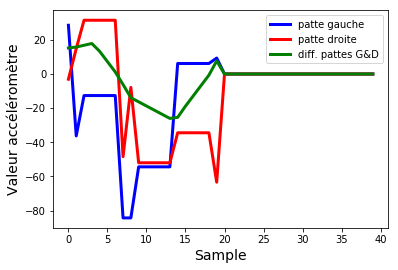

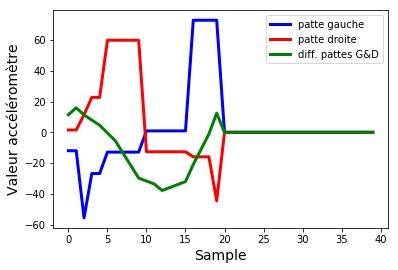

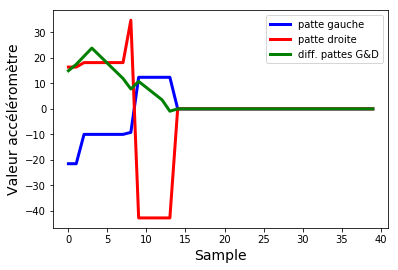

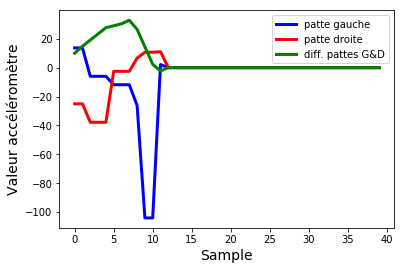

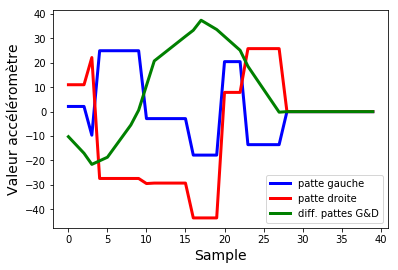

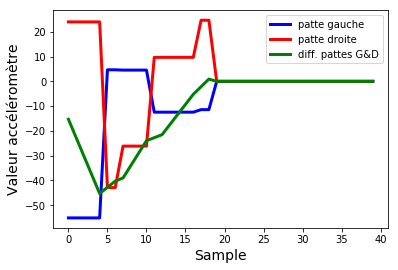

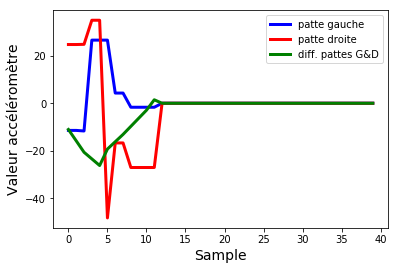

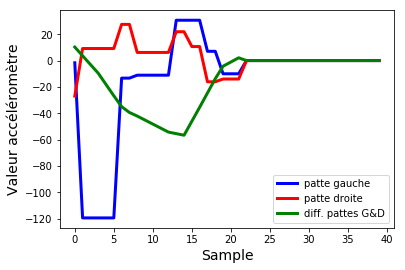

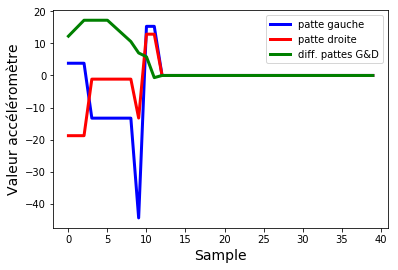

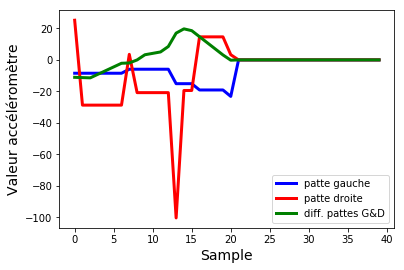

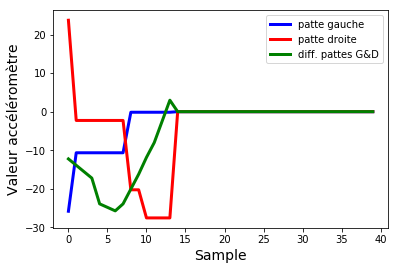

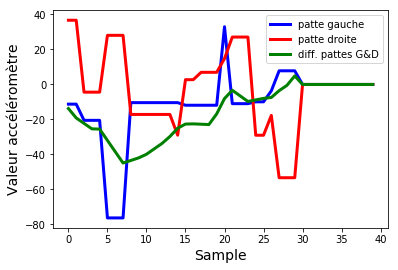

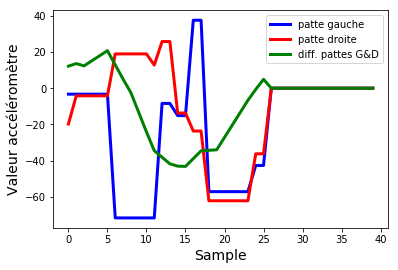

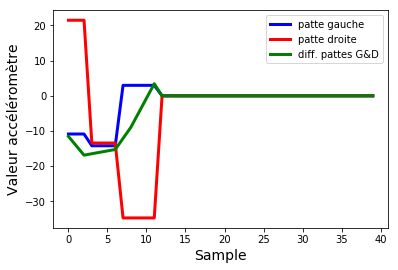

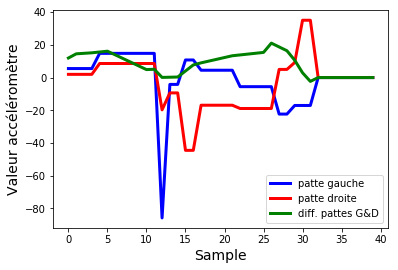

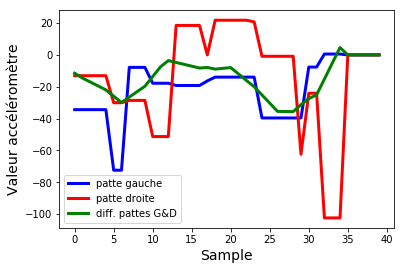

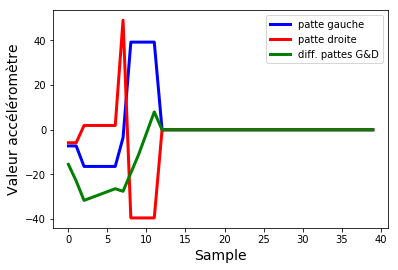

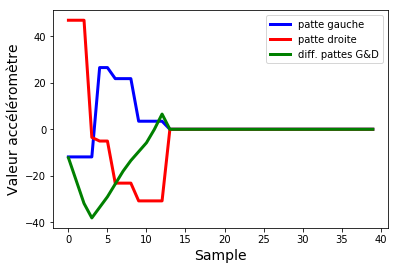

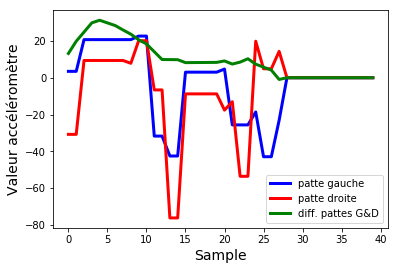

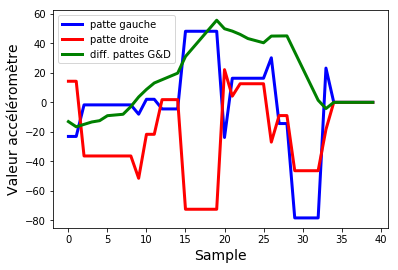

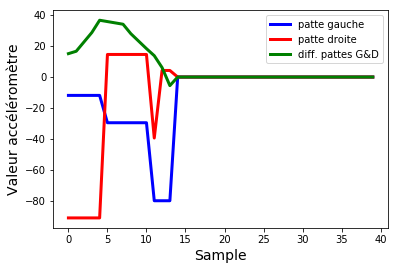

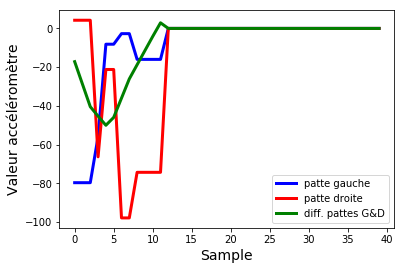

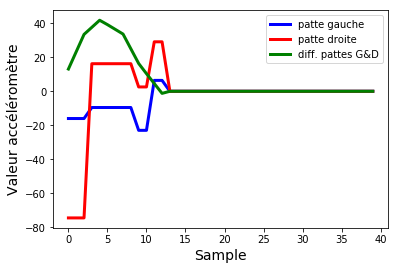

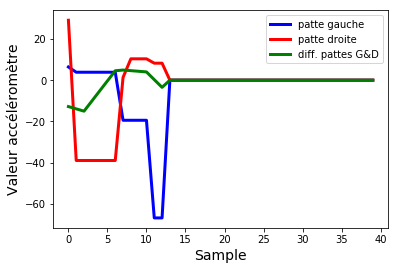

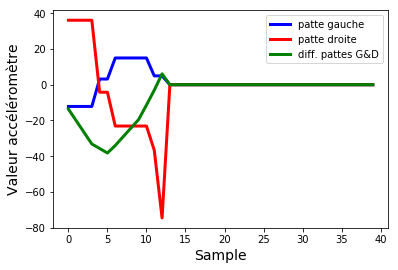

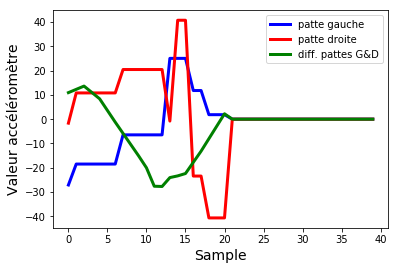

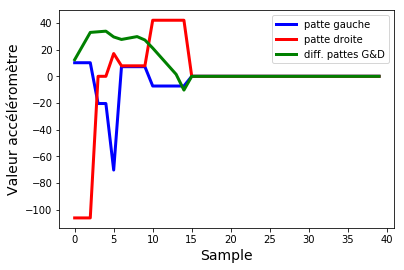

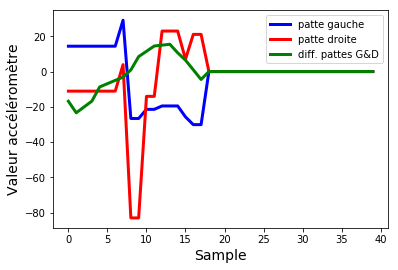

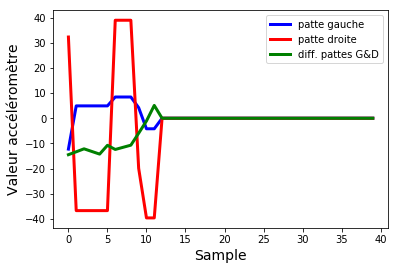

KeyboardInterrupt: 

In [6]:
for i in range (data_reshape.shape[0]):
    Pas = data_reshape[i,:]

    fig, axes = plt.subplots(1)
    axes.set_ylabel("Valeur accéléromètre", fontsize=14)
    axes.set_xlabel("Sample", fontsize=14)
    axes.plot(Pas[:,0],color='blue', lw=3, label='patte gauche')
    axes.plot(Pas[:,1],color='red', lw=3, label='patte droite')
    axes.plot(Pas[:,2],color='green', lw=3, label='diff. pattes G&D')
    axes.legend()
    plt.show()

In [ ]:
"""def Filtrage_data (data, sample):
    data_filt = []
    for i in range (sample,len(data) - sample):
        val=0
        for k in range (2*sample):
            val += data[i-sample+k]
            data_filt.append(val/2/sample)
            data_filt.append(0)
            data_filt.append(0)
    return data_filt
filtered_Pas_Gauche = Filtrage_data(Pas_Gauche,2)
#print(filtered_data)
"""

In [ ]:
####Fonction de lissage
def lissage(Ly,p):
    '''Fonction qui débruite une courbe par une moyenne glissante
    sur 2P+1 points'''
    Lyout=[]
    for index in range(p, len(Ly)-p):
        average = np.mean(Ly[index-p : index+p+1])
        Lyout.append(average)
    return Lyout
  
Filtered_Pas_Gauche= np.transpose(lissage(Pas_Gauche, 1))
f = open("data_file.txt", "a")
f.write(str(Filtered_Pas_Gauche))

Pas_Gauche = Pas_Gauche.reshape(int(Pas_Gauche.shape[0]/40),40,1,1)
#Filtered_Pas_Gauche = Filtered_Pas_Gauche.reshape(int(Filtered_Pas_Gauche.shape[0]/40),40,1,1)


In [ ]:
#Pas_Gauche = Pas_Gauche.reshape(int(Pas_Gauche.shape[0]/40),40,1,1)
print(Pas_Gauche.shape)
for i in range (100):
    Pas = Pas_Gauche[i,:]
    print(Pas.shape)
    fig, axes = plt.subplots(1)
    fig.suptitle('Pas_Gauche')

    axes.set_ylabel("Valeur accéléromètre", fontsize=14)
    axes.set_xlabel("Sample", fontsize=14)
    axes.plot(Pas[:,0],color='blue', lw=3, label='pas 0')
    axes.legend()
    plt.show()